In [9]:
%pip install textblob

Note: you may need to restart the kernel to use updated packages.


In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re

from textblob import TextBlob
import nltk
nltk.download('punkt')


[nltk_data] Error loading punkt: <urlopen error [SSL:
[nltk_data]     CERTIFICATE_VERIFY_FAILED] certificate verify failed:
[nltk_data]     unable to get local issuer certificate (_ssl.c:1018)>


False

In [11]:
# Load dataset
df = pd.read_csv("twitter_training.csv", header=None)

# Assign column names
df.columns = ['Tweet_ID', 'Brand', 'Sentiment', 'Tweet']

# Display first rows
print(df.head())


   Tweet_ID        Brand Sentiment  \
0      2401  Borderlands  Positive   
1      2401  Borderlands  Positive   
2      2401  Borderlands  Positive   
3      2401  Borderlands  Positive   
4      2401  Borderlands  Positive   

                                               Tweet  
0  im getting on borderlands and i will murder yo...  
1  I am coming to the borders and I will kill you...  
2  im getting on borderlands and i will kill you ...  
3  im coming on borderlands and i will murder you...  
4  im getting on borderlands 2 and i will murder ...  


In [12]:
def clean_text(text):
    text = str(text).lower()
    text = re.sub(r"http\S+", "", text)        # remove URLs
    text = re.sub(r"@\w+", "", text)           # remove mentions
    text = re.sub(r"#", "", text)              # remove hashtag symbol
    text = re.sub(r"[^a-z\s]", "", text)       # remove special chars
    return text

df['Clean_Tweet'] = df['Tweet'].apply(clean_text)


In [13]:
def get_sentiment(text):
    return TextBlob(text).sentiment.polarity

df['Polarity'] = df['Clean_Tweet'].apply(get_sentiment)


In [14]:
def sentiment_label(score):
    if score > 0:
        return 'Positive'
    elif score < 0:
        return 'Negative'
    else:
        return 'Neutral'

df['Predicted_Sentiment'] = df['Polarity'].apply(sentiment_label)


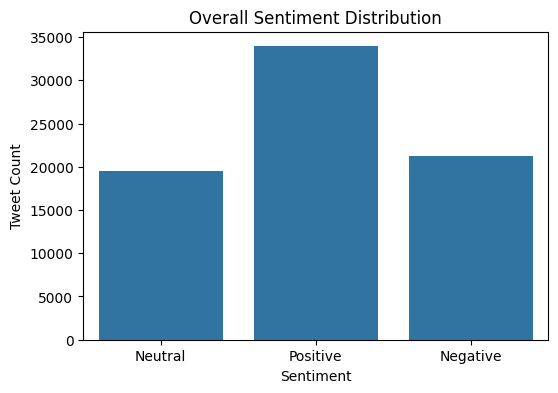

In [15]:
plt.figure(figsize=(6,4))
sns.countplot(x='Predicted_Sentiment', data=df)
plt.title("Overall Sentiment Distribution")
plt.xlabel("Sentiment")
plt.ylabel("Tweet Count")
plt.show()


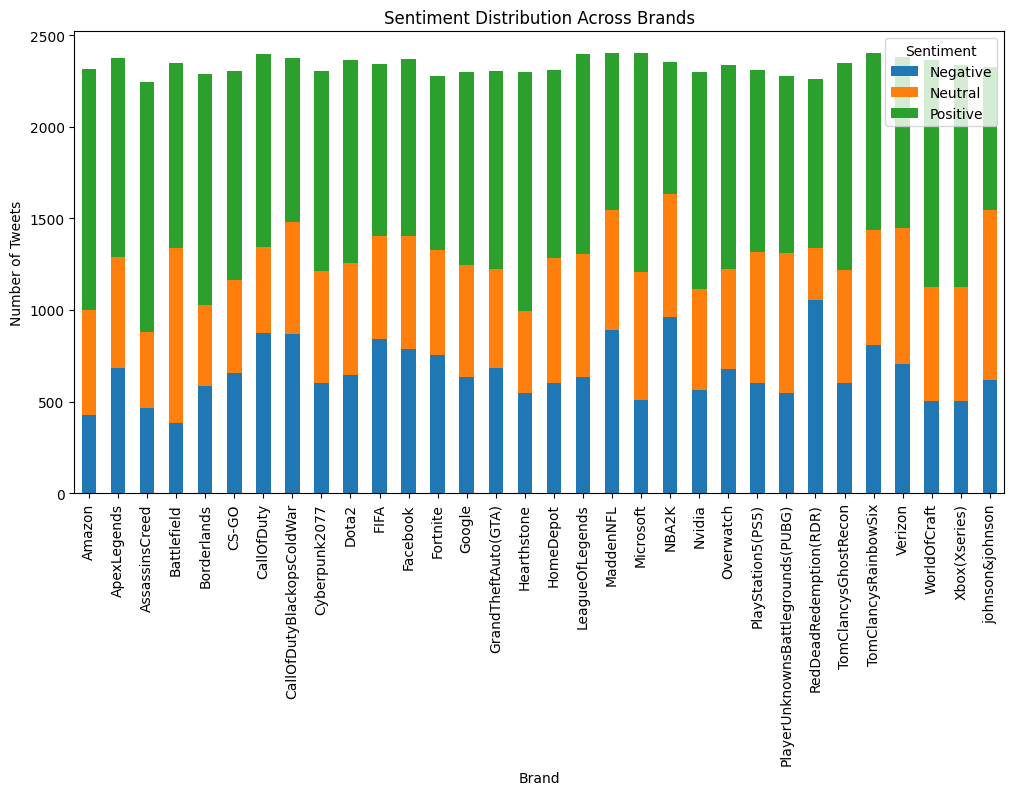

In [16]:
brand_sentiment = df.groupby(['Brand', 'Predicted_Sentiment']).size().unstack(fill_value=0)

brand_sentiment.plot(kind='bar', stacked=True, figsize=(12,6))
plt.title("Sentiment Distribution Across Brands")
plt.xlabel("Brand")
plt.ylabel("Number of Tweets")
plt.legend(title="Sentiment")
plt.show()


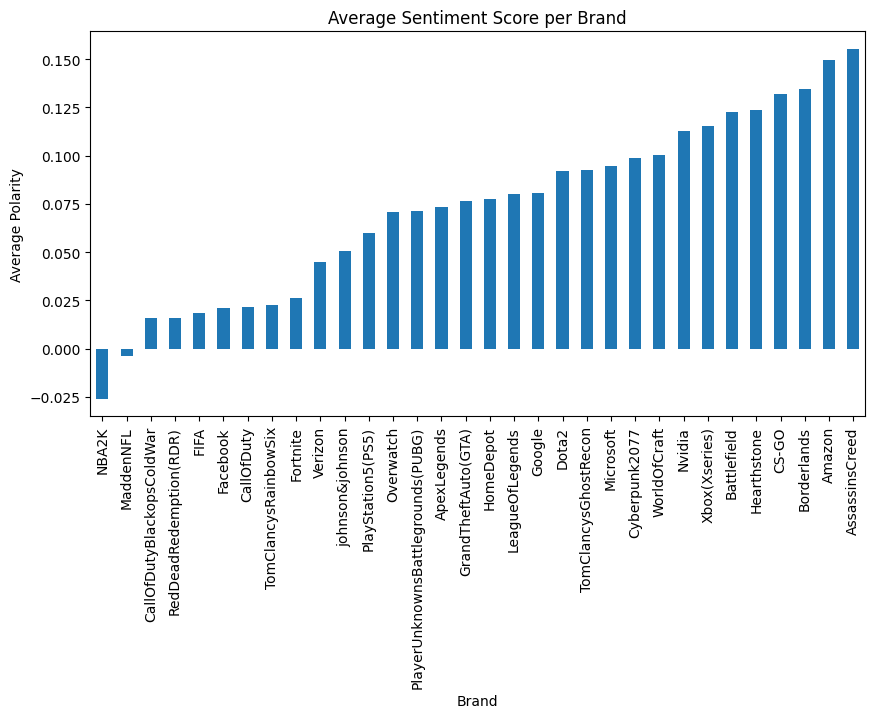

In [17]:
avg_sentiment = df.groupby('Brand')['Polarity'].mean().sort_values()

plt.figure(figsize=(10,5))
avg_sentiment.plot(kind='bar')
plt.title("Average Sentiment Score per Brand")
plt.ylabel("Average Polarity")
plt.xlabel("Brand")
plt.show()
